In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
# import tensorflow as tf
#import random
#np.random.seed(42) # set seed value for reproducibility
#random.seed(42)
#tf.random.set_seed(42)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
# from tensorflow import keras
# from keras import layers
# from keras import backend as K
# from tensorflow.keras.layers import Dense, Dropout, Input, Concatenate
# from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import RandomizedSearchCV
# from tensorflow.keras import regularizers
from sklearn.compose import TransformedTargetRegressor
#import random
from sklearn.linear_model import LinearRegression
#from deap import algorithms, base, creator, tools

In [ ]:
from matplotlib import pylab
from pylab import *
import pandas as pd
import numpy as np
import datetime

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV)
from sklearn.metrics import (mean_squared_error, mean_absolute_error)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier # Used for imputing rare / missing values
from google.colab import files
# Regressors considered:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge # only model used for final submission
SEED = 0

In [ ]:
uploaded = files.upload()


Saving MMI_Data_V5V3.csv to MMI_Data_V5V3 (4).csv


In [ ]:
df = pd.read_csv("MMI_Data_V5V3.csv")

In [ ]:
df

,Store_ID,City_Class,Zone,Years,Type,Density,City,State,Household,Population,...,KFC,McDonalds,Pizza_Hut,Starbucks,Subway,Carpet_Area,LFR_Score,LFR_Revenue,Rent,FY23NSV
0,P004,Metro Cities,West,23,HS,25481,Ahmedabad,Gujarat,105723,500071,...,1,6,4,1,9,24257,6,134,147.208458,25
1,P010,Mini-Metro Cities,North,20,Local,6523,Gurugram,Haryana,35770,184347,...,15,19,15,18,34,13400,23,138,171.450050,8
2,P023,Metro Cities,North,16,Local,27492,New Delhi,Delhi,117955,539533,...,1,2,3,0,1,10803,20,174,23.645920,4
3,P030,Metro Cities,South,16,HS,26267,Chennai,Tamil Nadu,129698,515497,...,2,3,4,1,5,14239,11,176,94.569644,7
4,P032,Metro Cities,South,16,Local,6239,Bengaluru,Karnataka,72188,264488,...,1,1,1,1,1,15607,6,88,115.306928,18
5,P038,Mini-Metro Cities,North,16,Local,15980,Ghaziabad,Uttar Pradesh,95363,451586,...,2,4,5,2,7,15094,6,90,118.519558,14
6,P048,Mini-Metro Cities,West,12,Organised,10817,Bhopal,Madhya Pradesh,65040,305688,...,2,1,1,2,1,20857,7,70,158.094738,27
7,P051,Mini-Metro Cities,West,12,Local,16484,Aurangabad,Maharashtra,93705,465824,...,1,2,1,0,0,18030,7,87,79.712899,11
8,P052,Class 1,East,12,Organised,5748,Durgapur,West Bengal,66673,288761,...,1,1,1,0,1,24144,3,69,82.718947,21
9,P053,Metro Cities,South,12,Organised,5181,Hyderabad,Telangana,24306,101673,...,3,4,2,5,10,15457,17,202,164.723710,20


In [ ]:
category_col ='Zone'

In [ ]:
category_counts = {'West': 95, 'North': 90, 'South': 88, 'East': 81}

In [ ]:
from sklearn.model_selection import train_test_split

def stratified_train_test_validation_split(data, category_col, category_counts, test_ratio, val_ratio, random_state=None):
    train_data = pd.DataFrame()
    test_data = pd.DataFrame()
    validation_data = pd.DataFrame()

    for category, count in category_counts.items():
        # Extract data for the current category
        category_data = data[data[category_col] == category]

        # Perform train-test split for the current category
        category_train, category_test = train_test_split(
            category_data,
            test_size=int(count * test_ratio),
            random_state=random_state,
            stratify=category_data[category_col]
        )

        # Perform train-validation split for the current category
        category_train, category_validation = train_test_split(
            category_train,
            test_size=int(count * val_ratio),
            random_state=random_state,
            stratify=category_train[category_col]
        )

        # Concatenate the splits to the overall train, test and validation datasets
        train_data = pd.concat([train_data, category_train])
        test_data = pd.concat([test_data, category_test])
        validation_data = pd.concat([validation_data, category_validation])

    return train_data, test_data, validation_data


In [ ]:
train_data, test_data, validation_data= stratified_train_test_validation_split(df, category_col, category_counts, test_ratio=0.3, val_ratio=0.1, random_state=SEED)

In [ ]:
validation_data1 = validation_data

In [ ]:
# def process_data(df):

#     weights = pd.DataFrame()
#     # Convert date strings to "days open" numerical value
#     #df["Open_date"] = df["Open_date"].apply(lambda x: pd.to_datetime(x, format='%d-%m-%Y'))
#     #last_date = df["Open_date"].max()
#     #df["Open_date"] = last_date - df["Open_date"] # This becomes a datetime delta object
#     #df["Open_date"] = df["Open_date"].dt.days + 1 # converts the delta object to an int

#     # Scale "days since opened" so that the marginal impact decreases over time
#     df["Log Years Opened"] = df["Years"].apply(np.log)
#     df = df.drop(["Years"], axis=1)

#     # Convert categorical variables to dummy variables
#     df = df.join(pd.get_dummies(df['City_Class'], prefix="CG", prefix_sep="_"))
#     df = df.join(pd.get_dummies(df['Type'], prefix="T", prefix_sep="_"))
#     df = df.join(pd.get_dummies(df['Zone'], prefix="Z", prefix_sep="_"))

#     # Generate 'City_infra' feature
#     columns = ['Rent','CG_Class 1', 'CG_Class 2', 'CG_Class 3', 'CG_Metro Cities',
#                'CG_Mini-Metro Cities', 'CG_Rest of India','Z_North','Z_West','Z_South','Z_East']#'Log Days Opened'
#     features = [col for col in df[columns] if col != 'FY23NSV']
#     X = df[features]
#     model = LinearRegression().fit(X, df['FY23NSV'])
#     df['City_infra'] = X.dot(model.coef_)
#     new_row = pd.DataFrame(model.coef_, index=features, columns=['City_infra'])
#     weights = pd.concat([weights,new_row])




#     # #Generate 'Aesthetics' feature (Var1 is category, {Var2 Var3 is continuous})
#     # df = df.join(pd.get_dummies(df['Var1'], prefix="Z", prefix_sep="_"))
#     # columns = ['Z_Var11','Z_Var12', 'Var2', 'Var3' ]#'Log Days Opened'
#     # features = [col for col in df[columns] if col != 'FY23NSV']
#     # X = df[features]
#     # model = LinearRegression().fit(X, df['FY23NSV'])
#     # df['Aesthetics'] = X.dot(model.coef_)
#     # weights = weights.append(pd.DataFrame(model.coef_, index=features, columns=['Aesthetics']))


#     # Generate 'Retail_infra' feature
#     columns = ['Shopping_Malls','Department_Store','Electronics_Store', 'Major_QSRs', 'Clothing-Other_Brand', 'LFRClothingBrand','T_HS', 'T_Organised','T_Local']
#     features = [col for col in df[columns] if col != 'FY23NSV']#'Minor_QSRs', 'Non_Clothing_Brand'
#     X = df[features]
#     model = LinearRegression().fit(X, df['FY23NSV'])
#     df['Retail_infra'] = X.dot(model.coef_)
#     new_row = pd.DataFrame(model.coef_, index=features, columns=['Retail_infra'])
#     weights = pd.concat([weights,new_row])

#     # Generate 'PT_data' feature
#     columns = ['Carpet_Area','Log Years Opened']  #'Rent',
#     features = [col for col in df[columns] if col != 'FY23NSV']
#     X = df[features]
#     model = LinearRegression().fit(X, df['FY23NSV'])
#     df['PT_data'] = X.dot(model.coef_)
#     new_row = pd.DataFrame(model.coef_, index=features, columns=['PT_data'])
#     weights = pd.concat([weights,new_row])

#             # Generate one-hot encodings for 'State'
#         # Create state encodings
#     states = ["Maharashtra", "West Bengal", "Gujarat", "Tamil Nadu", "Andhra Pradesh", "Telangana", "Haryana"]
#     State_encodings = pd.get_dummies(df["State"], prefix='State')

#     # Add missing states with default value 0
#     for state in states:
#         if "State_" + state not in State_encodings.columns:
#             State_encodings["State_" + state] = 0

#     # Calculate "State_Other"
#     State_encodings["State_Other"] = 0
#     for index, rows in State_encodings.iterrows():
#         if all(rows["State_" + state] == 0 for state in states):
#             State_encodings.loc[index, "State_Other"] = 1

#     # Reorder columns
#     State_encodings = State_encodings[["State_" + state for state in states + ["Other"]]]

#     # Concatenate state encodings to the original dataframe
#     df = pd.concat([df, State_encodings], axis=1)

#     # Generate 'Demography' feature
#     columns = ['Household','Affluence_(%)','LFR_Revenue',"State_Maharashtra", "State_West Bengal", "State_Gujarat", "State_Tamil Nadu", "State_Andhra Pradesh", "State_Telangana", "State_Haryana", "State_Other"]
#     features = [col for col in df[columns] if col != 'FY23NSV']
#     X = df[features]
#     model = LinearRegression().fit(X, df['FY23NSV'])
#     df['Demography'] = X.dot(model.coef_)
#     new_row = pd.DataFrame(model.coef_, index=features, columns=['Demography'])
#     weights = pd.concat([weights,new_row])

#     return df, weights.transpose()


In [ ]:
def process_data(df):

    weights = pd.DataFrame()
    # Convert date strings to "days open" numerical value
    #df["Open_date"] = df["Open_date"].apply(lambda x: pd.to_datetime(x, format='%d-%m-%Y'))
    #last_date = df["Open_date"].max()
    #df["Open_date"] = last_date - df["Open_date"] # This becomes a datetime delta object
    #df["Open_date"] = df["Open_date"].dt.days + 1 # converts the delta object to an int

    # Scale "days since opened" so that the marginal impact decreases over time
    df["Log Years Opened"] = df["Years"].apply(np.log)
    df = df.drop(["Years"], axis=1)

    # Convert categorical variables to dummy variables
    df = df.join(pd.get_dummies(df['City_Class'], prefix="CG", prefix_sep="_"))
    df = df.join(pd.get_dummies(df['Type'], prefix="T", prefix_sep="_"))
    df = df.join(pd.get_dummies(df['Zone'], prefix="Z", prefix_sep="_"))

    # Generate 'City_infra' feature
    columns = ['Rent','CG_Class 1', 'CG_Class 2', 'CG_Class 3', 'CG_Metro Cities',
               'CG_Mini-Metro Cities', 'CG_Rest of India','Z_North','Z_West','Z_South','Z_East']#'Log Days Opened'
    features = [col for col in df[columns] if col != 'FY23NSV']
    X = df[features]
    model = LinearRegression().fit(X, df['FY23NSV'])
    df['City_infra'] = X.dot(model.coef_)
    weights = weights.append(pd.DataFrame(model.coef_, index=features, columns=['City_infra']))




    # #Generate 'Aesthetics' feature (Var1 is category, {Var2 Var3 is continuous})
    # df = df.join(pd.get_dummies(df['Var1'], prefix="Z", prefix_sep="_"))
    # columns = ['Z_Var11','Z_Var12', 'Var2', 'Var3' ]#'Log Days Opened'
    # features = [col for col in df[columns] if col != 'FY23NSV']
    # X = df[features]
    # model = LinearRegression().fit(X, df['FY23NSV'])
    # df['Aesthetics'] = X.dot(model.coef_)
    # weights = weights.append(pd.DataFrame(model.coef_, index=features, columns=['Aesthetics']))


    # Generate 'Retail_infra' feature
    columns = ['Shopping_Malls','Department_Store','Electronics_Store', 'Major_QSRs', 'Clothing-Other_Brand', 'LFRClothingBrand','T_HS', 'T_Organised','T_Local']
    features = [col for col in df[columns] if col != 'FY23NSV']#'Minor_QSRs', 'Non_Clothing_Brand'
    X = df[features]
    model = LinearRegression().fit(X, df['FY23NSV'])
    df['Retail_infra'] = X.dot(model.coef_)
    weights = weights.append(pd.DataFrame(model.coef_, index=features, columns=['Retail_infra']))

    # Generate 'PT_data' feature
    columns = ['Carpet_Area','Log Years Opened']  #'Rent',
    features = [col for col in df[columns] if col != 'FY23NSV']
    X = df[features]
    model = LinearRegression().fit(X, df['FY23NSV'])
    df['PT_data'] = X.dot(model.coef_)
    weights = weights.append(pd.DataFrame(model.coef_, index=features, columns=['PT_data']))

            # Generate one-hot encodings for 'State'
        # Create state encodings
    states = ["Maharashtra", "West Bengal", "Gujarat", "Tamil Nadu", "Andhra Pradesh", "Telangana", "Haryana"]
    State_encodings = pd.get_dummies(df["State"], prefix='State')

    # Add missing states with default value 0
    for state in states:
        if "State_" + state not in State_encodings.columns:
            State_encodings["State_" + state] = 0

    # Calculate "State_Other"
    State_encodings["State_Other"] = 0
    for index, rows in State_encodings.iterrows():
        if all(rows["State_" + state] == 0 for state in states):
            State_encodings.loc[index, "State_Other"] = 1

    # Reorder columns
    State_encodings = State_encodings[["State_" + state for state in states + ["Other"]]]

    # Concatenate state encodings to the original dataframe
    df = pd.concat([df, State_encodings], axis=1)

    # Generate 'Demography' feature
    columns = ['Household','Affluence_(%)','LFR_Revenue',"State_Maharashtra", "State_West Bengal", "State_Gujarat", "State_Tamil Nadu", "State_Andhra Pradesh", "State_Telangana", "State_Haryana", "State_Other"]
    features = [col for col in df[columns] if col != 'FY23NSV']
    X = df[features]
    model = LinearRegression().fit(X, df['FY23NSV'])
    df['Demography'] = X.dot(model.coef_)
    weights = weights.append(pd.DataFrame(model.coef_, index=features, columns=['Demography']))

    return df, weights.transpose()

In [ ]:
# pip install pandas==1.4.0

In [ ]:
df = pd.concat([train_data, test_data], axis= 0)

In [ ]:
df, weights = process_data(df)

In [ ]:
df

,Store_ID,City_Class,Zone,Type,Density,City,State,Household,Population,Population_affl,...,PT_data,State_Maharashtra,State_West Bengal,State_Gujarat,State_Tamil Nadu,State_Andhra Pradesh,State_Telangana,State_Haryana,State_Other,Demography
95,P079,Mini-Metro Cities,West,Local,3631,Raipur,Chhattisgarh,22211,102622,12263,...,11.896391,0,0,0,0,0,0,0,1,3.002662
96,P083,Mini-Metro Cities,West,Local,16362,Vadodara,Gujarat,102921,462391,138810,...,15.814170,0,0,1,0,0,0,0,1,7.368431
315,P438,Metro Cities,West,HS,31061,Ahmedabad,Gujarat,128876,609581,205673,...,11.907714,0,0,1,0,0,0,0,1,7.438439
62,P185,Metro Cities,West,Local,43165,Mumbai,Maharashtra,504563,2168602,918837,...,18.050143,1,0,0,0,0,0,0,1,17.448524
122,P156,Class 1,West,HS,10608,Kolhapur,Maharashtra,91431,408049,95932,...,17.086275,1,0,0,0,0,0,0,1,6.219626
317,P440,Mini-Metro Cities,West,Local,8843,Raipur,Chhattisgarh,54005,249917,50733,...,10.037066,0,0,0,0,0,0,0,1,3.603980
296,P413,Metro Cities,West,Organised,39735,Mumbai,Maharashtra,171510,779793,299752,...,23.375006,1,0,0,0,0,0,0,1,9.129104
126,P161,Metro Cities,West,Local,12492,Pune,Maharashtra,58777,245161,115986,...,12.654937,1,0,0,0,0,0,0,1,8.580274
50,P039,Mini-Metro Cities,West,HS,14898,Nagpur,Maharashtra,92329,421028,167022,...,24.563360,1,0,0,0,0,0,0,1,12.278316
259,P369,Metro Cities,West,HS,21367,Pune,Maharashtra,99640,419330,194695,...,14.198408,1,0,0,0,0,0,0,1,8.259013


In [ ]:
# df = df[['Zone','City_infra', 'Retail_infra', 'PT_data',
#        'Demography', 'Aesthetics', 'FY23NSV']] #

df = df[['Zone','City_infra', 'Retail_infra', 'PT_data',
       'Demography', 'FY23NSV']] #

In [ ]:
df.corr()

,City_infra,Retail_infra,PT_data,Demography,FY23NSV
City_infra,1.000000,0.482530,0.348899,0.529106,0.603672
Retail_infra,0.482530,1.000000,0.467943,0.655720,0.591574
PT_data,0.348899,0.467943,1.000000,0.487914,0.752339
Demography,0.529106,0.655720,0.487914,1.000000,0.563573
FY23NSV,0.603672,0.591574,0.752339,0.563573,1.000000


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Initialize a LabelEncoder
le_ISO = LabelEncoder()

# Encode the 'Zone' column if it's a categorical variable
if df['Zone'].dtype == 'object':
    df['Zone_encoded'] = le_ISO.fit_transform(df['Zone'])

# Initialize the Isolation Forest model
ISOmodel = IsolationForest(contamination=0.06, random_state=SEED)  # set the proportion of outliers you expect here

# Prepare data for scaling
df_to_scale = df[['Zone_encoded', 'City_infra', 'Retail_infra', 'PT_data', 'Demography', 'FY23NSV']]

# Scale the features to have zero mean and unit variance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_to_scale)

# Fit the model
ISOmodel.fit(scaled_features)

# Get the anomaly score for each observation
scores = ISOmodel.decision_function(scaled_features)

# Get the predicted outliers
outliers = ISOmodel.predict(scaled_features)

# Add the scores and the predictions to the dataframe
df['scores'] = scores
df['outliers'] = outliers

# Reverse the encoding for 'Zone'
df['Zone'] = le_ISO.inverse_transform(df['Zone_encoded'])

# Drop the encoded 'Zone' column
df.drop(['Zone_encoded'], axis=1, inplace=True)


In [ ]:
#df = pd.concat([df2,df], axis =1)

In [ ]:
#df.to_csv("C:/Users/sagar.mhatre/Downloads/Lat_Long_2/Model/Quantile/Data_File/outlier.csv")

import matplotlib.pyplot as plt

plt.hist(df['scores'], bins=50)
plt.title('Histogram of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import seaborn as sns

# Mark the outliers in the DataFrame
df['is_outlier'] = df['outliers'] == -1

# Plot pairwise relationships between features, colored by the 'is_outlier' flag
#sns.pairplot(df, vars=['City_infra', 'Retail_infra', 'PT_data', 'Demography', 'FY23NSV'], hue='is_outlier')
#plt.show()


from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Add PCA results to DataFrame
df['PC1'], df['PC2'] = principal_components[:, 0], principal_components[:, 1]

# Plot the data using the two principal components, colored by the 'is_outlier' flag
sns.scatterplot(data=df, x='PC1', y='PC2', hue='is_outlier')
plt.title('Scatter Plot of Two Principal Components')
plt.show()


In [ ]:
df = df[df['outliers'] == 1]


In [ ]:
df = df[['Zone','City_infra', 'Retail_infra', 'PT_data',
       'Demography', 'FY23NSV']]

In [ ]:
df

,Zone,City_infra,Retail_infra,PT_data,Demography,FY23NSV
95,West,5.089911,-1.518361,11.896391,3.002662,6
96,West,12.728957,3.287219,15.814170,7.368431,21
315,West,9.594917,4.369247,11.907714,7.438439,8
62,West,8.423958,9.397260,18.050143,17.448524,10
122,West,10.505346,-0.382890,17.086275,6.219626,9
317,West,10.442963,1.510383,10.037066,3.603980,9
126,West,6.415061,-1.344227,12.654937,8.580274,6
50,West,8.003662,5.381473,24.563360,12.278316,13
259,West,8.714650,1.484533,14.198408,8.259013,17
7,West,6.640462,1.026347,20.684762,8.193062,11


In [ ]:
def stratified_train_test_split(data, category_col, category_counts, test_ratio, random_state=None):
    train_data = pd.DataFrame()
    test_data = pd.DataFrame()

    for category, count in category_counts.items():
        # Extract data for the current category
        category_data = data[data[category_col] == category]

        # Perform train-test split for the current category
        category_train, category_test = train_test_split(
            category_data, test_size=int(count * test_ratio), random_state=random_state, stratify=category_data[category_col]
        )

        # Concatenate the splits to the overall train and test datasets
        train_data = pd.concat([train_data, category_train])
        test_data = pd.concat([test_data, category_test])

    return train_data, test_data


In [ ]:
train, test = stratified_train_test_split(df, category_col, category_counts, test_ratio = 0.2, random_state=SEED)

In [ ]:
train

,Zone,City_infra,Retail_infra,PT_data,Demography,FY23NSV
96,West,12.728957,3.287219,15.814170,7.368431,21
353,West,5.127229,-3.575404,10.009689,4.692496,4
242,West,4.212663,-0.825821,8.815053,3.346254,3
0,West,10.813385,9.673782,27.522524,8.845856,25
217,West,0.973049,-1.463159,10.250474,6.121990,4
204,West,1.702001,-2.233860,11.272872,3.112127,9
185,West,9.399472,-3.920681,11.741343,4.941222,9
234,West,9.129670,12.632140,10.910360,13.156893,7
196,West,1.887144,-2.695475,10.531799,1.936184,5
307,West,6.154664,-1.287089,14.183084,3.067258,7


In [ ]:
# For the training data
X_train = train.drop(columns=['FY23NSV','Zone'])
y_train = train['FY23NSV']

# For the test data
X_test = test.drop(columns=['FY23NSV','Zone'])
y_test = test['FY23NSV']


In [ ]:
#y_train_log = np.log1p(y_train)
#y_test_log = np.log1p(y_test)

In [ ]:
columns = X_train.columns

In [ ]:
columns

Index(['City_infra', 'Retail_infra', 'PT_data', 'Demography'], dtype='object')

In [ ]:
ct = ColumnTransformer([('scaler', StandardScaler(), columns)])

In [ ]:
X_train

,City_infra,Retail_infra,PT_data,Demography
96,12.728957,3.287219,15.814170,7.368431
353,5.127229,-3.575404,10.009689,4.692496
242,4.212663,-0.825821,8.815053,3.346254
0,10.813385,9.673782,27.522524,8.845856
217,0.973049,-1.463159,10.250474,6.121990
204,1.702001,-2.233860,11.272872,3.112127
185,9.399472,-3.920681,11.741343,4.941222
234,9.129670,12.632140,10.910360,13.156893
196,1.887144,-2.695475,10.531799,1.936184
307,6.154664,-1.287089,14.183084,3.067258


In [ ]:
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

In [ ]:
X_train_scaled

array([[ 1.39030691,  0.76800739,  0.31852875,  0.48743299],
       [-0.44715234, -1.05305627, -0.85598671, -0.25002302],
       [-0.66821772, -0.32342779, -1.09771695, -0.62103121],
       [ 0.92728259,  2.46274374,  2.68767108,  0.89459356],
       [-1.45128419, -0.49255158, -0.80726479,  0.14392863],
       [-1.27508479, -0.69706462, -0.60038617, -0.68555381],
       [ 0.58551716, -1.14467875, -0.50559286, -0.18147715],
       [ 0.52030179,  3.24777257, -0.67373925,  2.08266419],
       [-1.23033276, -0.81955841, -0.75033974, -1.00962989],
       [-0.19880482, -0.44582976, -0.01151563, -0.69791923],
       [ 1.99478538,  2.9019471 , -0.5659071 ,  0.84606785],
       [-0.52521903, -0.89014385, -1.35349763, -0.72965745],
       [-1.10764884, -0.800095  , -0.57393009, -1.03259518],
       [-0.21878293,  0.37546589,  0.53094706,  1.2215654 ],
       [ 0.87473339, -0.4332224 , -0.39417684,  0.4108106 ],
       [ 0.43151457, -0.49926198, -0.2878259 ,  0.6167758 ],
       [ 0.41998475,  0.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

def tune_hyperparameters(model, param_distributions, X_train, y_train, n_iter=10, cv=5, n_jobs=-1):
    """
    Uses randomized search cross-validation to find the best hyperparameters for a given model.

    Parameters:
    model (sklearn estimator): The model to tune.
    param_distributions (dict): Dictionary of hyperparameter distributions to sample from.
    X_train (pandas DataFrame): The training data.
    y_train (pandas Series): The target variable for the training data.
    n_iter (int): The number of parameter settings that are sampled.
    cv (int or cross-validation generator): Determines the cross-validation splitting strategy.
    n_jobs (int): The number of CPUs to use for parallel processing. -1 means to use all available CPUs.

    Returns:
    best_estimator (sklearn estimator): The best estimator found during hyperparameter tuning.
    best_params (dict): The best hyperparameters found during hyperparameter tuning.
    cv_results (dict): The cross-validation results including train and test scores.
    """
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,random_state=SEED,
                                       n_iter=n_iter, cv=cv, n_jobs=n_jobs, return_train_score=True)
    random_search.fit(X_train, y_train)
    best_estimator = random_search.best_estimator_
    best_params = random_search.best_params_
    cv_results = random_search.cv_results_

    # Print the cross-validation scores with overfitting and underfitting information
    print("Cross-validation scores:\n")
    for i, (mean_train, mean_test, std_train, std_test, params) in enumerate(zip(cv_results["mean_train_score"], cv_results["mean_test_score"], cv_results["std_train_score"], cv_results["std_test_score"], cv_results["params"])):
        print(f"Train score: {mean_train:.4f} (std: {std_train:.4f}) | Test score: {mean_test:.4f} (std: {std_test:.4f}) for {params}")
        if i == random_search.best_index_:
            print("This is the best estimator based on the test score.")

    return best_estimator, best_params, cv_results


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def tune_hyperparameters_classification(model, param_distributions, X_train, y_train, n_iter=10, cv=5, n_jobs=-1, scoring='accuracy'):
    """
    Uses randomized search cross-validation to find the best hyperparameters for a given classification model.
    ...
    Returns:
    same as before...
    """
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, scoring=scoring, random_state=SEED,
                                       n_iter=n_iter, cv=cv, n_jobs=n_jobs, return_train_score=True)
    random_search.fit(X_train, y_train)
    best_estimator = random_search.best_estimator_
    best_params = random_search.best_params_
    cv_results = random_search.cv_results_

    # Print the cross-validation scores with overfitting and underfitting information
    print("Cross-validation scores:\n")
    for i, (mean_train, mean_test, std_train, std_test, params) in enumerate(zip(cv_results["mean_train_score"], cv_results["mean_test_score"], cv_results["std_train_score"], cv_results["std_test_score"], cv_results["params"])):
        print(f"Train score: {mean_train:.4f} (std: {std_train:.4f}) | Test score: {mean_test:.4f} (std: {std_test:.4f}) for {params}")
        if i == random_search.best_index_:
            print("This is the best estimator based on the test score.")

    print("\nBest Score: ", random_search.best_score_)
    print("\nClassification Report for the best estimator:\n")
    print(classification_report(y_train, best_estimator.predict(X_train)))

    return best_estimator, best_params, cv_results


Cross-validation scores:

Train score: 0.9793 (std: 0.0116) | Test score: 0.6000 (std: 0.0525) for {'subsample': 0.5, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.8}
Train score: 0.9783 (std: 0.0060) | Test score: 0.5870 (std: 0.0615) for {'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.7}
Train score: 1.0000 (std: 0.0000) | Test score: 0.6043 (std: 0.0348) for {'subsample': 0.6, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 20, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.7}
Train score: 0.8500 (std: 0.0163) | Test score: 0.6130 (std: 0.0733) for {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 10, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.7}
Train score: 0.9337 (std: 0.0080) | Test score: 0.6000 (std: 0.0468) for {'subsample': 0.8, 'n_estimators': 50, 'min_

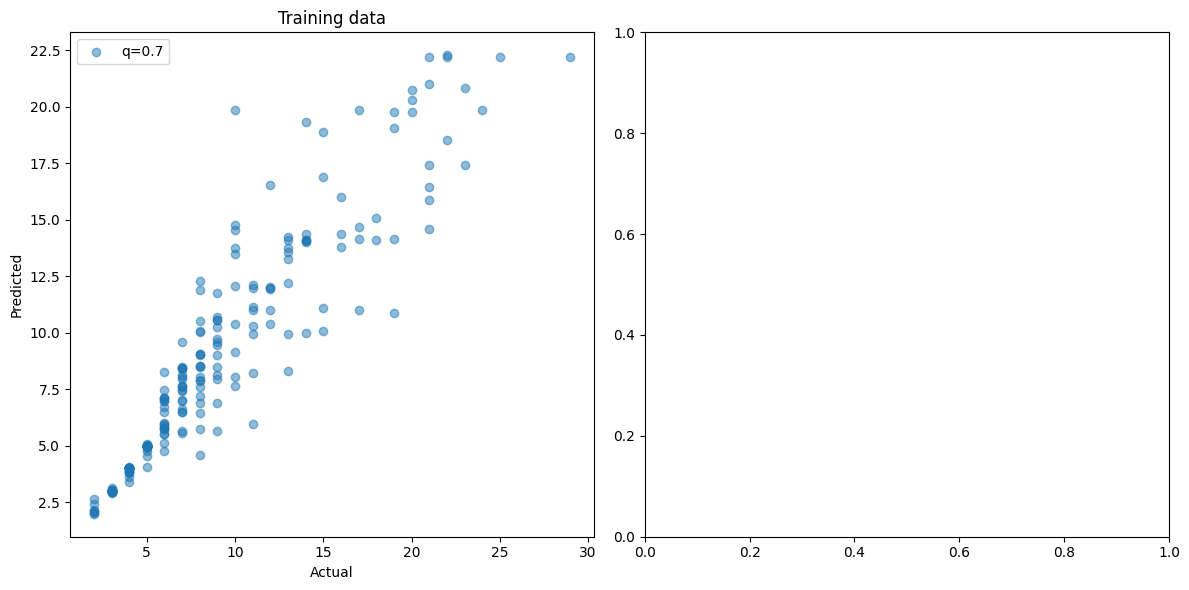

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import pickle
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight

# Set the quantiles you want to predict
quantiles = [0.3, 0.7]
loaded_models = {}
predictions_train = {}

# Define the hyperparameters grid
param_distributions = {
    'n_estimators': np.arange(50, 500, 30),
    'max_depth': np.arange(2, 10, 1),
    'learning_rate': np.logspace(-3, 0, 3),
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 10, 2),
    'subsample': np.linspace(0.5, 1, 2)
}

q1, q9 = y_train.quantile([0.3, 0.7])
y_train_df = y_train.to_frame()
y_train_df.columns = ['target']
y_train_df['quantile_category'] = 'middle'
y_train_df.loc[y_train_df['target'] <= q1, 'quantile_category'] = 'q1'
y_train_df.loc[y_train_df['target'] >= q9, 'quantile_category'] = 'q9'

# Initialize and fit the LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_df['quantile_category'])

# Compute class weights
class_weights = compute_class_weight('balanced', classes=[0, 1, 2], y=y_train_encoded)

# Create the XGBoost classifier with class weights
classifier = xgb.XGBClassifier(objective='multi:softmax', class_weight={0: class_weights[0], 1: class_weights[1], 2: class_weights[2]})
#classifier = xgb.XGBClassifier()

xgb_param_distributions = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 5, 10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3,5,10],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5]
}

# Initialize the RandomForestClassifier and fit it to the data
#classifier = RandomForestClassifier(class_weight={0: class_weights[0], 1: class_weights[1], 2: class_weights[2]})
rf_param_distributions = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}




rf_best, rf_params , rf_cv_results= tune_hyperparameters_classification(classifier, xgb_param_distributions, X_train_scaled, y_train_encoded)
rf_best.fit(X_train_scaled, y_train_encoded)


# Train a model for each quantile
best_models = []
best_params = []
for i, quantile in enumerate(quantiles):
    model = GradientBoostingRegressor(loss='quantile', alpha=quantile)
    best_estimator, best_param, cv_results = tune_hyperparameters(model, param_distributions, X_train_scaled, y_train)
    best_models.append(best_estimator)
    best_params.append(best_param)

    # Save the trained model to a file
    with open(f'best_model_quantile_{quantile}.pkl', 'wb') as f:
        pickle.dump(best_estimator, f)
 # Function to predict combined quantile results
def predict_combined(model_01, model_09, X):
    predictions_01 = model_01.predict(X)
    predictions_09 = model_09.predict(X)
    combined_predictions = 0.5 * (predictions_01 + predictions_09)
    return combined_predictions

# Save the combined model and predict_combined function to a file
combined_model = {
    'quantile_0.1_model': best_models[0],
    'quantile_0.9_model': best_models[1],
    'predict_combined': predict_combined
}

with open('combined_model.pkl', 'wb') as f:
    pickle.dump(combined_model, f)

# Load the models for the given quantiles and make predictions
for q in quantiles:
    filename = f'best_model_quantile_{q}.pkl'
    with open(filename, 'rb') as f:
        model = pickle.load(f)
        loaded_models[f'model_q{int(q*10)}'] = model
        predictions_train[f'X_train_pred_q{int(q*10)}'] = model.predict(X_train_scaled)
        print(f"Model for quantile {q} loaded from {filename} and predictions made.")

# Load the combined model
with open('combined_model.pkl', 'rb') as f:
    loaded_models['combined_model'] = pickle.load(f)
    print("Combined model loaded")

# Combined prediction
predictions_train['X_train_pred_combined'] = 0.5 * (predictions_train[f'X_train_pred_q{int(quantiles[0]*10)}'] + predictions_train[f'X_train_pred_q{int(quantiles[1]*10)}'])

# Access predictions
X_train_pred_q1 = predictions_train[f'X_train_pred_q{int(quantiles[0]*10)}']
X_train_pred_q9 = predictions_train[f'X_train_pred_q{int(quantiles[1]*10)}']
X_train_pred_combined = predictions_train['X_train_pred_combined']

# Prepare DataFrame
df_predictions_train = pd.DataFrame({
    'Actual': y_train,
    'Prediction_q1': X_train_pred_q1,
    'Prediction_q9': X_train_pred_q9,
    'Prediction_combined': X_train_pred_combined,
    'quantile_category':y_train_df['quantile_category'].values.ravel()
})

# Add column for final prediction based on quantile category
df_predictions_train['final_prediction'] = df_predictions_train.apply(
    lambda row: row['Prediction_q1'] if row['quantile_category'] == 'q1'
    else (row['Prediction_q9'] if row['quantile_category'] == 'q9'
          else row['Prediction_combined']),
    axis=1
)



# Calculate metrics for combined predictions
r2_train_final = r2_score(y_train, df_predictions_train['final_prediction'])

train_mae_final = mean_absolute_error(y_train, df_predictions_train['final_prediction'])

print('Final Model:')
print(f'Training R2: {r2_train_final}, Training MAE: {train_mae_final}')



# Create scatter plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))



axes[0].scatter(y_train, df_predictions_train['final_prediction'], alpha=0.5, label=f'q={quantile}')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].set_title('Training data')



axes[0].legend()

plt.tight_layout()
plt.show()



feature_importances = rf_best.feature_importances_
feature_names = ['City_infra', 'Retail_infra', 'PT_data', 'Demography']
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_features = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)}
print("Feature Importances:")
for feature, importance in sorted_features.items():
    print(f"{feature}: {importance}")
import matplotlib.pyplot as plt

plt.bar(sorted_features.keys(), sorted_features.values())
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()



In [ ]:
df_predictions_train
# Adjust pandas display options
pd.set_option('display.max_rows', None)

# Now when you display a DataFrame, all rows will be shown
df_predictions_train

,Actual,Prediction_q1,Prediction_q9,Prediction_combined,quantile_category,final_prediction
96,21,15.784925,14.576471,15.180698,q9,14.576471
353,4,4.004505,5.937641,4.971073,q1,4.004505
242,3,2.996024,4.765048,3.880536,q1,2.996024
0,25,22.218899,22.214972,22.216935,q9,22.214972
217,4,3.949263,5.568167,4.758715,q1,3.949263
204,9,5.295285,5.997642,5.646464,middle,5.646464
185,9,6.992175,8.874656,7.933415,middle,7.933415
234,7,6.988365,9.746079,8.367222,middle,8.367222
196,5,4.921747,4.983831,4.952789,q1,4.921747
307,7,6.998289,8.314051,7.656170,middle,7.656170


from itertools import combinations

def find_best_quantile_interval(quantile_candidates, param_distributions, X_train_scaled, y_train, X_test_scaled, y_test):
    # Train a model for each quantile
    models = {}
    best_params = {}
    for quantile in quantile_candidates:
        model = GradientBoostingRegressor(loss='quantile', alpha=quantile)
        best_estimator, best_param, cv_results = tune_hyperparameters(model, param_distributions, X_train_scaled, y_train)
        models[quantile] = best_estimator
        best_params[quantile] = best_param

    # Compute the RMSE of the combined predictions for each pair of quantiles
    best_rmse = np.inf
    best_quantiles = None
    best_hyperparameters = None
    for quantile1, quantile2 in combinations(quantile_candidates, 2):
        model1 = models[quantile1]
        model2 = models[quantile2]
        y_test_pred_combined = 0.5 * (model1.predict(X_test_scaled) + model2.predict(X_test_scaled))
        rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_combined))
        if rmse < best_rmse:
            best_rmse = rmse
            best_quantiles = (quantile1, quantile2)
            best_hyperparameters = (best_params[quantile1], best_params[quantile2])

    return best_quantiles, best_rmse, best_hyperparameters

# Define the quantiles you want to test
quantile_candidates = np.linspace(0.1, 0.9, 5)  # [0.1, 0.2, ..., 0.9]

best_quantiles, best_rmse, best_hyperparameters = find_best_quantile_interval(quantile_candidates, param_distributions, X_train_scaled, y_train, X_test_scaled, y_test)

print('Best quantiles:', best_quantiles)
print('Best RMSE:', best_rmse)
print('Best hyperparameters:', best_hyperparameters)



import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import pickle

# Make a copy of the original data
X_train_copy = pd.DataFrame(X_train_scaled.copy(), columns=X)
X_test_copy = pd.DataFrame(X_test_scaled.copy(), columns=X)


# Compute the quantiles and classify the target variable
q1, q9 = y_train.quantile([0.1, 0.9])
y_train_df = y_train.to_frame()
y_train_df.columns = ['target']
y_train_df['quantile_category'] = 'middle'
y_train_df.loc[y_train_df['target'] <= q1, 'quantile_category'] = 'q1'
y_train_df.loc[y_train_df['target'] >= q9, 'quantile_category'] = 'q9'




# Initialize and fit the LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_df['quantile_category'])

# Initialize the RandomForestClassifier and fit it to the data
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_copy, y_train_encoded)

# Predict the test data
y_test_pred = classifier.predict(X_test_copy)
# Score of classification model
#print(f"Classification Model Score: {classifier.score(X_test_copy, le.transform(y_test_df['quantile_category']))}")
y_test_original = le.inverse_transform(y_test_pred)

y_test_original

In [ ]:
X = ['City_infra', 'Retail_infra', 'PT_data', 'Demography']

In [ ]:
import pandas as pd

from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import pickle
loaded_models = {}
predictions_test = {}

# Make a copy of the original data

X_test_copy = pd.DataFrame(X_test_scaled.copy(), columns=X)

# Predict the test data
y_test_pred = rf_best.predict(X_test_copy)
# Score of classification model
#print(f"Classification Model Score: {classifier.score(X_test_copy, le.transform(y_test_df['quantile_category']))}")

y_test_original = le.inverse_transform(y_test_pred)
y_test_original = pd.DataFrame(y_test_original)
# Convert y_test to a DataFrame and add quantile categories
#y_test_original_df = y_test_original.to_frame()
y_test_original.columns = ['quantile_category']
y_test_df = y_test.to_frame()
y_test_df.columns = ['target']
y_test_df.reset_index(drop=True, inplace=True)
y_test_df = pd.concat([y_test_df,y_test_original], axis =1)

# Variables to consider for prediction
variables = ['City_infra', 'Retail_infra', 'PT_data', 'Demography']

# Dynamically load models based on the quantiles and make predictions
# Load the models for the given quantiles and make predictions
for q in quantiles:
    filename = f'best_model_quantile_{q}.pkl'
    with open(filename, 'rb') as f:
        model = pickle.load(f)
        loaded_models[f'model_q{int(q*10)}'] = model
        predictions_test[f'X_test_pred_q{int(q*10)}'] = model.predict(X_test_copy)
        print(f"Model for quantile {q} loaded from {filename} and predictions made.")

# Load the combined model
with open('combined_model.pkl', 'rb') as f:
    loaded_models['combined_model'] = pickle.load(f)
    print("Combined model loaded")

# Combined prediction
predictions_test['X_test_pred_combined'] = 0.5 * (predictions_test[f'X_test_pred_q{int(quantiles[0]*10)}'] + predictions_test[f'X_test_pred_q{int(quantiles[1]*10)}'])

# Access predictions
X_test_pred_q1 = predictions_test[f'X_test_pred_q{int(quantiles[0]*10)}']
X_test_pred_q9 = predictions_test[f'X_test_pred_q{int(quantiles[1]*10)}']
X_test_pred_combined = predictions_test['X_test_pred_combined']

# Prepare DataFrame
df_predictions_test = pd.DataFrame({
    'Actual': y_test,
    'Prediction_q1': X_test_pred_q1,
    'Prediction_q9': X_test_pred_q9,
    'Prediction_combined': X_test_pred_combined,
    'quantile_category':y_test_df['quantile_category'].values.ravel()
})

# Add column for final prediction based on quantile category
df_predictions_test['final_prediction'] = df_predictions_test.apply(
    lambda row: row['Prediction_q1'] if row['quantile_category'] == 'q1'
    else (row['Prediction_q9'] if row['quantile_category'] == 'q9'
          else row['Prediction_combined']),
    axis=1
)


test_r2 = r2_score(df_predictions_test['Actual'], df_predictions_test['final_prediction'])

test_mae = mean_absolute_error(y_test, df_predictions_test['final_prediction'])

print(f'Train R2: {r2_train_final}\nTest R2: {test_r2}\nTrain MAE: {train_mae_final}\nTest MAE: {test_mae}')

# Adjust pandas display options
pd.set_option('display.max_rows', None)

# Now when you display a DataFrame, all rows will be shown

df_predictions_test



Model for quantile 0.3 loaded from best_model_quantile_0.3.pkl and predictions made.
Model for quantile 0.7 loaded from best_model_quantile_0.7.pkl and predictions made.
Combined model loaded
Train R2: 0.8672769617186851
Test R2: 0.8120652065235962
Train MAE: 1.1414878261708858
Test MAE: 1.6921425796718341


,Actual,Prediction_q1,Prediction_q9,Prediction_combined,quantile_category,final_prediction
119,15,15.154662,15.608782,15.381722,q9,15.608782
326,8,9.899726,9.924859,9.912292,middle,9.912292
77,14,9.960942,10.184019,10.072480,q9,10.184019
173,7,5.648380,8.038389,6.843384,q1,5.648380
212,4,3.182438,4.016479,3.599458,q1,3.182438
156,22,19.593802,22.763980,21.178891,q9,22.763980
74,26,17.882193,20.530344,19.206268,q9,20.530344
342,9,6.799938,8.398387,7.599162,middle,7.599162
258,9,5.730242,7.368148,6.549195,middle,6.549195
336,5,5.346431,5.980591,5.663511,q1,5.346431


from sklearn.tree import plot_tree
feature_names = ['City_infra', 'Retail_infra', 'PT_data', 'Demography']

def plot_individual_tree(model, feature_names):
    # Pick up one tree from the ensemble
    tree = model.estimators_[5, 0]

    plt.figure(figsize=(20,10))
    plot_tree(tree, feature_names=feature_names, filled=True, rounded=True)
    plt.show()

# Load the models
with open('best_model_quantile_0.1.pkl', 'rb') as f:
    model_q1 = pickle.load(f)
with open('best_model_quantile_0.9.pkl', 'rb') as f:
    model_q9 = pickle.load(f)

# Assume we have feature_names as a list of the names of the features
# feature_names = ['feature1', 'feature2', 'feature3', ...]

# Plot a tree from each model
print("Tree for model with quantile 0.1")
plot_individual_tree(model_q1, feature_names)
print("Tree for model with quantile 0.9")
plot_individual_tree(model_q9, feature_names)


weights

In [ ]:
#weights.to_csv("C:/Users/sagar.mhatre/Downloads/Lat_Long_2/Data_Files/weights.csv")

# Validation Data

In [ ]:
#Validation = pd.read_csv("C:/Users/sagar.mhatre/Downloads/Lat_Long_2/Data_Files/validation.csv")

In [ ]:
def apply_weights(df_new, weights):
    # Preprocessing
    df_new["Log Years Opened"] = df_new["Years"].apply(np.log)
    df_new = df_new.drop(["Years"], axis=1)

    df_new = df_new.join(pd.get_dummies(df_new['City_Class'], prefix="CG", prefix_sep="_"))
    df_new = df_new.join(pd.get_dummies(df_new['Type'], prefix="T", prefix_sep="_"))
    df_new = df_new.join(pd.get_dummies(df_new['Zone'], prefix="Z", prefix_sep="_"))

    states = ["Maharashtra", "West Bengal", "Gujarat", "Tamil Nadu", "Andhra Pradesh", "Telangana", "Haryana"]
    State_encodings = pd.get_dummies(df_new["State"], prefix='State')
    for state in states:
        if "State_" + state not in State_encodings.columns:
            State_encodings["State_" + state] = 0
    State_encodings["State_Other"] = 0
    for index, rows in State_encodings.iterrows():
        if all(rows["State_" + state] == 0 for state in states):
            State_encodings.loc[index, "State_Other"] = 1
    State_encodings = State_encodings[["State_" + state for state in states + ["Other"]]]
    df_new = pd.concat([df_new, State_encodings], axis=1)

    # Apply weights to 'City_infra' features
    features = ['Rent','CG_Class 1', 'CG_Class 2', 'CG_Class 3', 'CG_Metro Cities',
                'CG_Mini-Metro Cities', 'CG_Rest of India','Z_North','Z_West','Z_South','Z_East']
    features = [feature for feature in features if feature in df_new.columns]
    df_new['City_infra'] = df_new[features].apply(lambda row: np.sum(row * weights.loc['City_infra', features]), axis=1)

    # # Apply weights to 'Aesthetics' features - Var1 is categorical, VAr2 & Var3 is continuous
    # df_new = df_new.join(pd.get_dummies(df_new['Var1'], prefix="Z", prefix_sep="_"))
    # features = ['Z_Var11','Z_Var12', 'Var2', 'Var3']
    # features = [feature for feature in features if feature in df_new.columns]
    # df_new['Aesthetics'] = df_new[features].apply(lambda row: np.sum(row * weights.loc['Aesthetics', features]), axis=1)

    # Apply weights to 'Retail_infra' features
    features = ['Shopping_Malls','Department_Store','Electronics_Store', 'Major_QSRs', 'Clothing-Other_Brand', 'LFRClothingBrand','T_HS', 'T_Organised','T_Local']#'Shopping_Malls',
    features = [feature for feature in features if feature in df_new.columns]
    df_new['Retail_infra'] = df_new[features].apply(lambda row: np.sum(row * weights.loc['Retail_infra', features]), axis=1)

    # Apply weights to 'PT_data' features
    features = ['Log Years Opened','Carpet_Area']
    features = [feature for feature in features if feature in df_new.columns]
    df_new['PT_data'] = df_new[features].apply(lambda row: np.sum(row * weights.loc['PT_data', features]), axis=1)

    # Apply weights to 'Demography' features
    features = ['Household','Affluence_(%)','LFR_Revenue',"State_Maharashtra", "State_West Bengal", "State_Gujarat", "State_Tamil Nadu", "State_Andhra Pradesh", "State_Telangana", "State_Haryana", "State_Other"]
    features = [feature for feature in features if feature in df_new.columns]
    df_new['Demography'] = df_new[features].apply(lambda row: np.sum(row * weights.loc['Demography', features]), axis=1)

    return df_new


In [ ]:
validation_data1.columns

Index(['Store_ID', 'City_Class', 'Zone', 'Years', 'Type', 'Density', 'City',
       'State', 'Household', 'Population', 'Population_affl', 'Male', 'Female',
       'Affluence_(%)', 'HH_Income_>_10_Lacs', 'HH_Income_(5-10)_Lacs',
       'HH_Income_(1.5-5)_Lacs', 'HH_Income_<_1.5Lacs', 'Air_Transport',
       'Automotive_Dealer', 'Automotive_Service', 'Commercial_Offices',
       'Government_Office', 'Financial_Service', 'Fuel_Station',
       'Surface_Transport', 'Recreation', 'Resorts', 'Nature_Attractions',
       'Major_Hospitals', 'School', 'College', 'University', 'Shopping_Malls',
       'Department_Store', 'Electronics_Store', 'Major_QSRs', 'Minor_QSRs',
       'Non_Clothing_Brand', 'LFRClothingBrand', 'Clothing-Other_Brand',
       'fabindia', 'fbb', 'H&M', 'Easybuy', 'Lifestyle', 'max',
       'SHOPPERS_STOP', 'Style_Union', 'Reliance_Trends', 'V-Mart', 'WESTSIDE',
       'Zudio', 'Zara', 'Barista', 'Burger_King', 'Cafe_Coffee_Day', 'Dominos',
       'KFC', 'McDonalds', 'Pizza_

In [ ]:
validation_data1

,Store_ID,City_Class,Zone,Years,Type,Density,City,State,Household,Population,...,KFC,McDonalds,Pizza_Hut,Starbucks,Subway,Carpet_Area,LFR_Score,LFR_Revenue,Rent,FY23NSV
247,P337,Metro Cities,West,5,HS,15799,Pune,Maharashtra,73025,310061,...,3,3,2,3,6,19731,10,179,156.469794,10
230,P218,Class 2,West,7,HS,1086,NaN,Madhya Pradesh,10964,54569,...,0,0,0,0,0,6157,1,8,45.530271,2
325,P449,Mini-Metro Cities,West,1,HS,22506,Rajkot,Gujarat,137962,636009,...,0,0,0,0,2,12803,1,37,102.594740,8
6,P048,Mini-Metro Cities,West,12,Organised,10817,Bhopal,Madhya Pradesh,65040,305688,...,2,1,1,2,1,20857,7,70,158.094738,27
207,P341,Mini-Metro Cities,West,5,Local,15391,Vadodara,Gujarat,97728,434956,...,2,3,2,1,5,9525,6,105,91.551027,9
143,P203,Metro Cities,West,6,Local,17734,Surat,Gujarat,73735,348038,...,0,2,0,0,0,13434,2,43,107.455461,8
92,P070,Mini-Metro Cities,West,10,Organised,46047,Thane,Maharashtra,325401,1301290,...,3,8,4,4,5,29453,12,145,171.507267,40
102,P104,Metro Cities,West,8,Local,31628,Pune,Maharashtra,145161,620704,...,2,3,1,0,3,16851,8,167,65.014081,8
209,P343,Class 1,West,4,Local,4110,Amravati,Maharashtra,33425,158102,...,0,0,0,0,0,7409,2,12,101.128571,5
300,P417,Class 2,North,3,Local,2252,Bhilwara,Rajasthan,23354,113161,...,0,0,0,0,0,8870,3,18,59.736770,3


In [ ]:
validation_data = apply_weights(validation_data1,weights)

In [ ]:
validation_data.columns

Index(['Store_ID', 'City_Class', 'Zone', 'Type', 'Density', 'City', 'State',
       'Household', 'Population', 'Population_affl', 'Male', 'Female',
       'Affluence_(%)', 'HH_Income_>_10_Lacs', 'HH_Income_(5-10)_Lacs',
       'HH_Income_(1.5-5)_Lacs', 'HH_Income_<_1.5Lacs', 'Air_Transport',
       'Automotive_Dealer', 'Automotive_Service', 'Commercial_Offices',
       'Government_Office', 'Financial_Service', 'Fuel_Station',
       'Surface_Transport', 'Recreation', 'Resorts', 'Nature_Attractions',
       'Major_Hospitals', 'School', 'College', 'University', 'Shopping_Malls',
       'Department_Store', 'Electronics_Store', 'Major_QSRs', 'Minor_QSRs',
       'Non_Clothing_Brand', 'LFRClothingBrand', 'Clothing-Other_Brand',
       'fabindia', 'fbb', 'H&M', 'Easybuy', 'Lifestyle', 'max',
       'SHOPPERS_STOP', 'Style_Union', 'Reliance_Trends', 'V-Mart', 'WESTSIDE',
       'Zudio', 'Zara', 'Barista', 'Burger_King', 'Cafe_Coffee_Day', 'Dominos',
       'KFC', 'McDonalds', 'Pizza_Hut', 'St

In [ ]:
#validation_data.to_csv("C:/Users/sagar.mhatre/Downloads/Lat_Long_2/Data_Files/valid.csv")

In [ ]:
#Validation3 = pd.read_csv("C:/Users/sagar.mhatre/Downloads/Lat_Long_2/Data_Files/Valid2.csv")

In [ ]:
Validation2 = validation_data[['Zone','FY23NSV']]

In [ ]:
Validation = validation_data.drop(columns =['Zone','FY23NSV'])

In [ ]:
df = validation_data[['Zone','City_infra', 'Retail_infra', 'PT_data',
       'Demography','FY23NSV']]

In [ ]:
# Encode the 'Zone' column if it's a categorical variable
if df['Zone'].dtype == 'object':
    df['Zone_encoded'] = le_ISO.fit_transform(df['Zone'])

# Prepare data for scaling
df_to_scale = df[['Zone_encoded', 'City_infra', 'Retail_infra', 'PT_data', 'Demography','FY23NSV']]

scaled_features = scaler.fit_transform(df_to_scale)


# Get the anomaly score for each observation
scores = ISOmodel.decision_function(scaled_features)

# Get the predicted outliers
outliers = ISOmodel.predict(scaled_features)

# Add the scores and the predictions to the dataframe
df['scores'] = scores
df['outliers'] = outliers

# Reverse the encoding for 'Zone'
df['Zone'] = le_ISO.inverse_transform(df['Zone_encoded'])

# Drop the encoded 'Zone' column
df.drop(['Zone_encoded'], axis=1, inplace=True)
df = df[df['outliers'] == 1]



In [ ]:
Validation = df[['City_infra', 'Retail_infra', 'PT_data',
       'Demography']]

In [ ]:
Validation

,City_infra,Retail_infra,PT_data,Demography
247,11.376065,3.754482,20.999817,13.287610
230,1.436657,-2.721081,8.681460,0.814424
325,8.030666,2.901776,12.086584,4.203592
6,11.402610,14.029069,23.353572,4.664331
207,7.359697,4.394078,11.364913,7.238063
143,8.398162,-2.068755,15.323987,4.726769
102,5.819604,0.775677,18.973931,12.714731
209,7.620055,-2.716700,9.038322,4.853340
300,1.798139,-2.210365,9.993420,2.388012
137,1.421174,-2.887511,13.151504,4.529176


In [ ]:
X_val_scaled = ct.transform(Validation)

In [ ]:
X_val_scaled

array([[ 1.06329122,  0.89200016,  1.36782535,  2.11868834],
       [-1.3392228 , -0.82635326, -1.12474902, -1.31877352],
       [ 0.25465479,  0.66572632, -0.43573467, -0.38475896],
       [ 1.0697077 ,  3.61846132,  1.84409904, -0.25778494],
       [ 0.09247081,  1.06172304, -0.58176206,  0.45150516],
       [ 0.34348444, -0.65325243,  0.2193419 , -0.24057767],
       [-0.27979432,  0.10154534,  0.95789473,  1.96080957],
       [ 0.15540362, -0.82519088, -1.05253916, -0.20569629],
       [-1.25184679, -0.69082977, -0.8592786 , -0.88511125],
       [-1.34296523, -0.87051712, -0.22025202, -0.2950321 ],
       [ 2.18644202,  3.890112  , -0.26571565,  1.52875023],
       [-0.33941771, -0.10536058, -0.57990107, -0.17853297],
       [-1.32071002, -0.988284  ,  0.13658017, -0.9880775 ],
       [-0.63285747, -0.55957954, -0.83095172,  0.02782243],
       [-1.24163889, -1.39770776,  1.80393557, -0.77123128],
       [ 2.47671905,  0.07118982,  0.1888335 , -0.30846085],
       [ 1.09639408,  4.

In [ ]:

y_val = df[['FY23NSV']]
y_val.reset_index(drop=True, inplace=True)

In [ ]:
variables = ['City_infra', 'Retail_infra', 'PT_data', 'Demography']
quantile_category = ['quantile_category']
predictions_val = {}
# Predict the test data
y_val_pred = rf_best.predict(X_val_scaled)
y_val_original = le.inverse_transform(y_val_pred)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=variables)
X_val_scaled['quantile_category'] = y_val_original

# Dynamically load models based on the quantiles and make predictions
# Load the models for the given quantiles and make predictions
for q in quantiles:
    filename = f'best_model_quantile_{q}.pkl'
    with open(filename, 'rb') as f:
        model = pickle.load(f)
        loaded_models[f'model_q{int(q*10)}'] = model
        predictions_val[f'X_val_pred_q{int(q*10)}'] = model.predict(X_val_scaled[variables])
        print(f"Model for quantile {q} loaded from {filename} and predictions made.")

# Load the combined model
with open('combined_model.pkl', 'rb') as f:
    loaded_models['combined_model'] = pickle.load(f)
    print("Combined model loaded")

# Combined prediction
predictions_val['X_val_pred_combined'] = 0.5 * (predictions_val[f'X_val_pred_q{int(quantiles[0]*10)}'] + predictions_val[f'X_val_pred_q{int(quantiles[1]*10)}'])

# Access predictions
X_val_pred_q1 = predictions_val[f'X_val_pred_q{int(quantiles[0]*10)}']
X_val_pred_q9 = predictions_val[f'X_val_pred_q{int(quantiles[1]*10)}']
X_val_pred_combined = predictions_val['X_val_pred_combined']


# Prepare DataFrame
df_predictions = pd.DataFrame({
    'Actual': y_val.values.ravel(),
    'Prediction_q1': X_val_pred_q1,
    'Prediction_q9': X_val_pred_q9,
    'Prediction_combined': X_val_pred_combined,
    'quantile_category':X_val_scaled['quantile_category'].values.ravel()
})

# Add column for final prediction based on quantile category
df_predictions['final_prediction'] = df_predictions.apply(
    lambda row: row['Prediction_q1'] if row['quantile_category'] == 'q1'
    else (row['Prediction_q9'] if row['quantile_category'] == 'q9'
          else row['Prediction_combined']),
    axis=1
)

# Adjust pandas display options
pd.set_option('display.max_rows', None)

# Now when you display a DataFrame, all rows will be shown

df_predictions


Model for quantile 0.3 loaded from best_model_quantile_0.3.pkl and predictions made.
Model for quantile 0.7 loaded from best_model_quantile_0.7.pkl and predictions made.
Combined model loaded


,Actual,Prediction_q1,Prediction_q9,Prediction_combined,quantile_category,final_prediction
0,10,17.388859,19.390006,18.389432,q9,19.390006
1,2,2.983527,4.106525,3.545026,q1,2.983527
2,8,5.322487,7.499242,6.410865,middle,6.410865
3,27,15.322908,22.294740,18.808824,q9,22.294740
4,9,6.448067,8.086541,7.267304,middle,7.267304
5,8,9.103216,9.946270,9.524743,q9,9.946270
6,8,11.693292,13.057978,12.375635,q9,13.057978
7,5,4.367590,7.196700,5.782145,q1,4.367590
8,3,3.509087,5.777668,4.643377,q1,3.509087
9,3,5.826969,7.167734,6.497352,middle,6.497352


In [ ]:
df_predictions.head(35)
df_predictions.drop(0, inplace=True) # Removed one outlier manually.
test_r3 = r2_score(df_predictions['Actual'], df_predictions['final_prediction'])
test_r3 ## Validation efficiency

0.7088202591453352

In [ ]:
uploaded = files.upload()


Saving Unseen_Validation_2.csv to Unseen_Validation_2.csv


In [ ]:
Validation =  pd.read_csv("Unseen_Validation_2.csv") #Test22 For previous validation

In [ ]:
Validation

,Store_ID,City_Class,Zone,Years,Type,Density,City,State,Household,Population,...,Dominos,KFC,McDonalds,Pizza Hut,Starbucks,Subway,Carpet_Area,LFR_Score,LFR_Revenue,Rent
0,NDR Mall - Chennai,Metro Cities,South,1,Local,18485.0,Chennai,Tamil Nadu,132044,522381,...,3.0,1.0,0.0,1.0,0.0,0.0,16007,2.300000,24.100000,75.0
1,Gulbarga,Class 1,South,1,HS,8841.0,Gulbarga,Karnataka,64359,340069,...,2.0,1.0,0.0,2.0,0.0,0.0,18907,3.900000,31.500000,60.0
2,Arambag,Rest of India,East,1,HS,2309.0,Arambag,West Bengal,26127,115984,...,0.0,0.0,0.0,0.0,0.0,0.0,12300,1.600000,8.200000,53.0
3,Burdwan,Class 2,East,1,HS,5719.0,Burdwan,West Bengal,67363,287334,...,2.0,0.0,0.0,0.0,0.0,0.0,14879,0.400000,2.400000,60.0
4,Kharagpur,Class 3,East,1,HS,3867.0,Kharagpur,West Bengal,42679,194275,...,1.0,0.0,0.0,0.0,0.0,0.0,9417,0.900000,5.400000,52.0
5,Mudichur,Metro Cities,South,1,HS,NaN,Chennai,Tamil Nadu,34085,133722,...,1.0,0.0,0.0,0.0,0.0,1.0,16000,1.900000,19.500000,62.0
6,Jp_Nagar_3,Metro Cities,South,1,Organised,8843.0,Bengaluru,Karnataka,240293,955898,...,12.0,6.0,9.0,10.0,6.0,10.0,70000,19.900000,204.400000,75.0
7,Jp_Nagar_5,Metro Cities,South,1,Organised,8843.0,Bengaluru,Karnataka,570389,2279058,...,32.0,16.0,16.0,22.0,8.0,12.0,70000,56.300000,579.600000,75.1
8,Nagole,Metro Cities,South,1,HS,NaN,Hyderabad,Telangana,72136,297898,...,NaN,NaN,NaN,NaN,NaN,NaN,20000,12.900000,132.600000,68.8
9,Palavkkam,Metro Cities,South,1,HS,NaN,chennai,Tamil Nadu,44800,171508,...,NaN,NaN,NaN,NaN,NaN,NaN,15800,12.100000,124.300000,107.1


In [ ]:
validation_data = apply_weights(Validation,weights)

In [ ]:
Validation = validation_data[['City_infra', 'Retail_infra', 'PT_data',
       'Demography']]

In [ ]:
Validation

,City_infra,Retail_infra,PT_data,Demography
0,5.083665,-5.292910,15.111298,0.020434
1,3.778617,-4.961135,17.849023,1.516945
2,3.516667,-3.353688,11.611730,6.394907
3,5.813611,-3.996667,14.046417,6.302956
4,3.564620,-3.353688,8.890054,6.338676
5,4.293840,-4.639645,15.104690,-0.513649
6,5.083665,-15.786600,66.083017,9.217448
7,5.089741,-22.537878,66.083017,25.745426
8,4.706979,-9.783477,18.880862,7.261232
9,7.033925,-15.891776,14.915881,3.815314


In [ ]:
X_Unseen_scaled =   ct.transform(Validation)

In [ ]:
predictions_pred = {}
# Predict the test data
y_val_pred = rf_best.predict(X_Unseen_scaled)
y_val_original = le.inverse_transform(y_val_pred)
X_val_scaled = pd.DataFrame(X_Unseen_scaled, columns=variables)
X_val_scaled['quantile_category'] = y_val_original

for q in quantiles:
    filename = f'best_model_quantile_{q}.pkl'
    with open(filename, 'rb') as f:
        model = pickle.load(f)
        loaded_models[f'model_q{int(q*10)}'] = model
        predictions_pred[f'X_val_pred_q{int(q*10)}'] = model.predict(X_Unseen_scaled)
        print(f"Model for quantile {q} loaded from {filename} and predictions made.")

# Load the combined model
with open('combined_model.pkl', 'rb') as f:
    loaded_models['combined_model'] = pickle.load(f)
    print("Combined model loaded")

# Combined prediction
predictions_pred['X_val_pred_combined'] = 0.5 * (predictions_pred[f'X_val_pred_q{int(quantiles[0]*10)}'] + predictions_pred[f'X_val_pred_q{int(quantiles[1]*10)}'])

# Access predictions
X_val_pred_q1 = predictions_pred[f'X_val_pred_q{int(quantiles[0]*10)}']
X_val_pred_q9 = predictions_pred[f'X_val_pred_q{int(quantiles[1]*10)}']
X_val_pred_combined = predictions_pred['X_val_pred_combined']

# Prepare DataFrame
df_predictions = pd.DataFrame({
    #'Actual': y_val.values.ravel(),
    'Prediction_q1': X_val_pred_q1,
    'Prediction_q9': X_val_pred_q9,
    'Prediction_combined': X_val_pred_combined,
    'quantile_category':X_val_scaled['quantile_category'].values.ravel()
})

# Add column for final prediction based on quantile category
df_predictions['final_prediction'] = df_predictions.apply(
    lambda row: row['Prediction_q1'] if row['quantile_category'] == 'q1'
    else (row['Prediction_q9'] if row['quantile_category'] == 'q9'
          else row['Prediction_combined']),
    axis=1
)



df_predictions

Model for quantile 0.3 loaded from best_model_quantile_0.3.pkl and predictions made.
Model for quantile 0.7 loaded from best_model_quantile_0.7.pkl and predictions made.
Combined model loaded


,Prediction_q1,Prediction_q9,Prediction_combined,quantile_category,final_prediction
0,5.672952,7.462975,6.567963,middle,6.567963
1,4.223466,7.974767,6.099116,q1,4.223466
2,3.453332,5.974701,4.714016,q1,3.453332
3,5.402639,8.323808,6.863223,middle,6.863223
4,4.295385,5.841954,5.068670,q1,4.295385
5,4.583764,7.345862,5.964813,q1,4.583764
6,6.918834,13.927392,10.423113,q9,13.927392
7,7.067808,14.169292,10.618550,q9,14.169292
8,6.615102,13.153242,9.884172,q9,13.153242
9,6.845611,8.343231,7.594421,middle,7.594421


In [ ]:
Store_locations = validation_data['Store_ID']

In [ ]:
Predictions = pd.concat([Store_locations,df_predictions], axis =1)

In [ ]:
Predictions

,Store_ID,Prediction_q1,Prediction_q9,Prediction_combined,quantile_category,final_prediction
0,NDR Mall - Chennai,5.672952,7.462975,6.567963,middle,6.567963
1,Gulbarga,4.223466,7.974767,6.099116,q1,4.223466
2,Arambag,3.453332,5.974701,4.714016,q1,3.453332
3,Burdwan,5.402639,8.323808,6.863223,middle,6.863223
4,Kharagpur,4.295385,5.841954,5.068670,q1,4.295385
5,Mudichur,4.583764,7.345862,5.964813,q1,4.583764
6,Jp_Nagar_3,6.918834,13.927392,10.423113,q9,13.927392
7,Jp_Nagar_5,7.067808,14.169292,10.618550,q9,14.169292
8,Nagole,6.615102,13.153242,9.884172,q9,13.153242
9,Palavkkam,6.845611,8.343231,7.594421,middle,7.594421
